In [56]:
import random, math
import numpy as np
import matplotlib.pyplot as plt

def Markov(N,δ):
    x,y=0,0
    inside=False
    x_inside=[]
    y_inside=[]
    x_outside=[]
    y_outside=[]
    for i in range(N):
        δx, δy = random.uniform(-δ,δ), random.uniform(-δ,δ)
        a,b=x+δx,y+δy
        if (abs(a)<1.) and (abs(b)<1.):  #move to new point
            x,y=a,b
            if x**2+y**2<1.:               #new point inside circle
                inside=True
                x_inside.append(x)
                y_inside.append(y)
            else:                          #new point outside circle
                inside=False
                x_outside.append(x)
                y_outside.append(y)
        else:                            #stay in former point
            if inside==True:               #stay inside circle
                x_inside.append(x)
                y_inside.append(y)
            else:                          #stay outside circle
                x_outside.append(x)
                y_outside.append(y)

    return x_inside, y_inside, x_outside, y_outside

After 1000 steps, the estimated π is equal to 3.284 for a relative error of 4.53 %


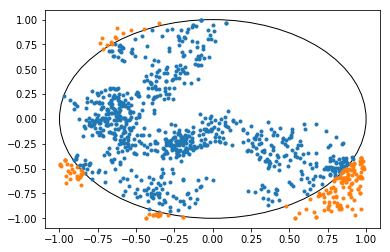

After 4000 steps, the estimated π is equal to 3.014 for a relative error of 4.06 %


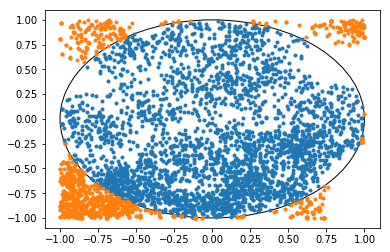

After 20000 steps, the estimated π is equal to 3.233 for a relative error of 2.91 %


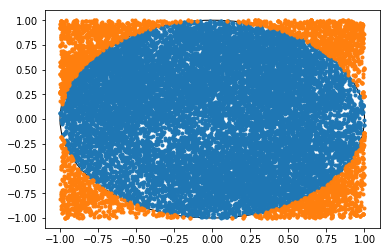

In [69]:
δ=.1

for N in [1000,4000,20000]:
    x_inside, y_inside, x_outside, y_outside = Markov(N,δ)
    π=4*len(x_inside)/N*1.
    print ("After",N,"steps, the estimated π is equal to",π,"for a relative error of",round(abs((π/math.pi)-1)*100,2),"%")

    ax = plt.gca()
    ax.cla()  

    Circle = plt.Circle((0,0),1, fill=False)
    plt.plot(x_inside,y_inside,'.')
    plt.plot(x_outside,y_outside,'.')
    ax.add_artist(Circle)

    plt.show()
